# Secao 3: Especificação de Histograma em PDI com Imagem Própria

## Configurações do Projeto e Funções úteis


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def calcular_histograma(imagem):    
    histograma = np.zeros(256, dtype=int)
        
    for valor in imagem.flatten():  
        histograma[valor] += 1  
    
    return histograma




## Carregando a imagem a ser utilizada

(np.float64(-0.5), np.float64(2135.5), np.float64(3206.5), np.float64(-0.5))

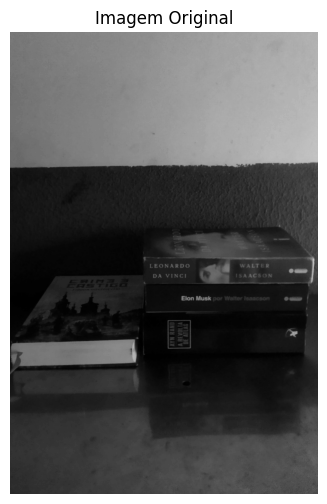

In [2]:
imagem_propria = cv2.imread('images/imagem_propria.jpg', cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(15, 6))
plt.subplot(1, 3, 1)
plt.imshow(imagem_propria, cmap='gray', vmin=0, vmax=255)  
plt.title('Imagem Original')
plt.axis('off')


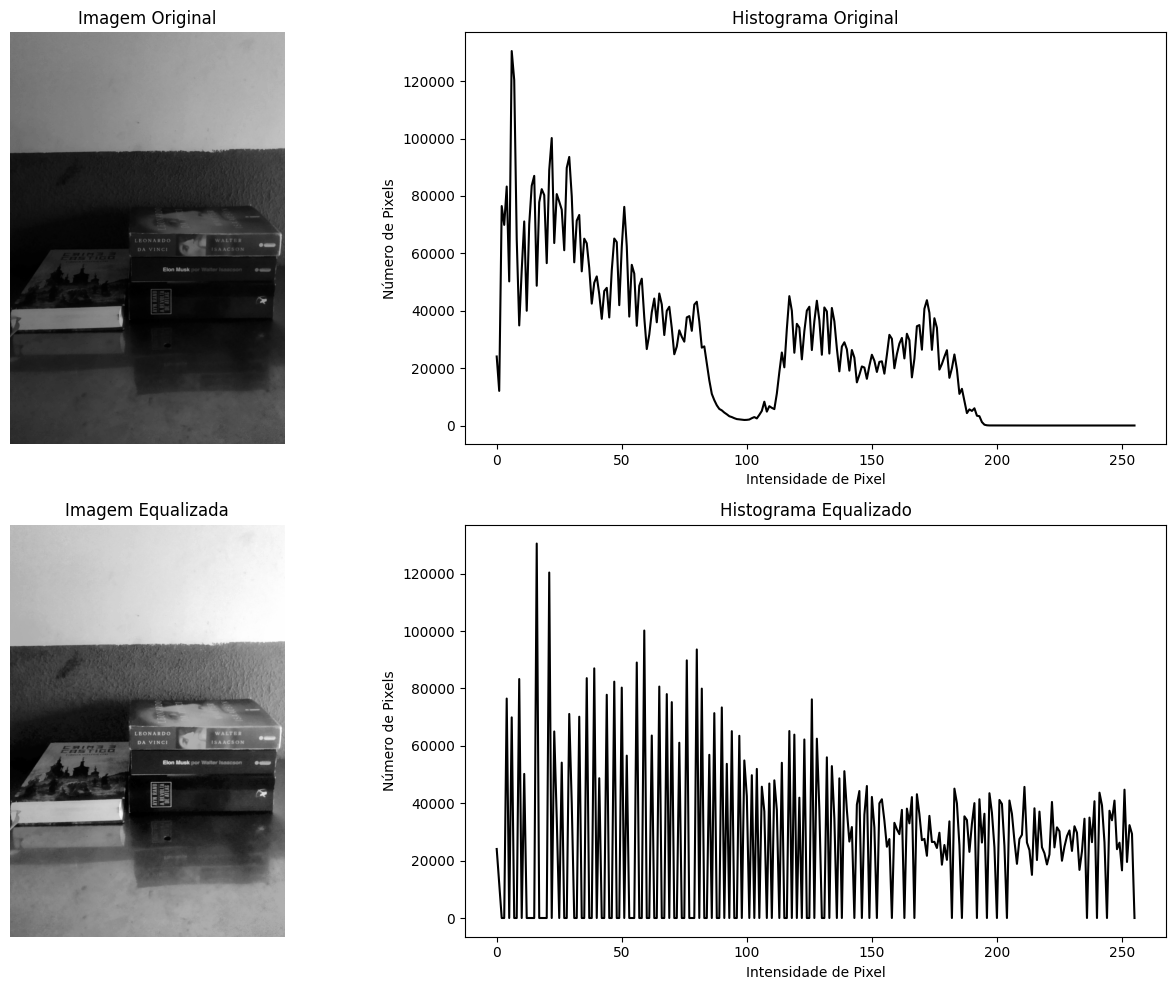

In [3]:
plt.figure(figsize=(14, 10))
def equalizar_histograma(imagem):    
    histograma = calcular_histograma(imagem)
    
    cdf = histograma.cumsum()  
    cdf_normalizado = cdf * (255 / cdf[-1])  
    
    imagem_equalizada = np.interp(imagem.flatten(), np.arange(256), cdf_normalizado)  
    imagem_equalizada = imagem_equalizada.reshape(imagem.shape)  

    return imagem_equalizada.astype(np.uint8)
imagem_propria_equalizada = equalizar_histograma(imagem_propria)

plt.subplot(2, 2, 1)
plt.imshow(imagem_propria, cmap='gray', vmin=0, vmax=255)
plt.title('Imagem Original')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.plot(calcular_histograma(imagem_propria), color='black')
plt.title('Histograma Original')
plt.xlabel('Intensidade de Pixel')
plt.ylabel('Número de Pixels')

plt.subplot(2, 2, 3)
plt.imshow(imagem_propria_equalizada, cmap='gray', vmin=0, vmax=255)
plt.title('Imagem Equalizada')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.plot(calcular_histograma(imagem_propria_equalizada), color='black')
plt.title('Histograma Equalizado')
plt.xlabel('Intensidade de Pixel')
plt.ylabel('Número de Pixels')

plt.tight_layout()
plt.show()


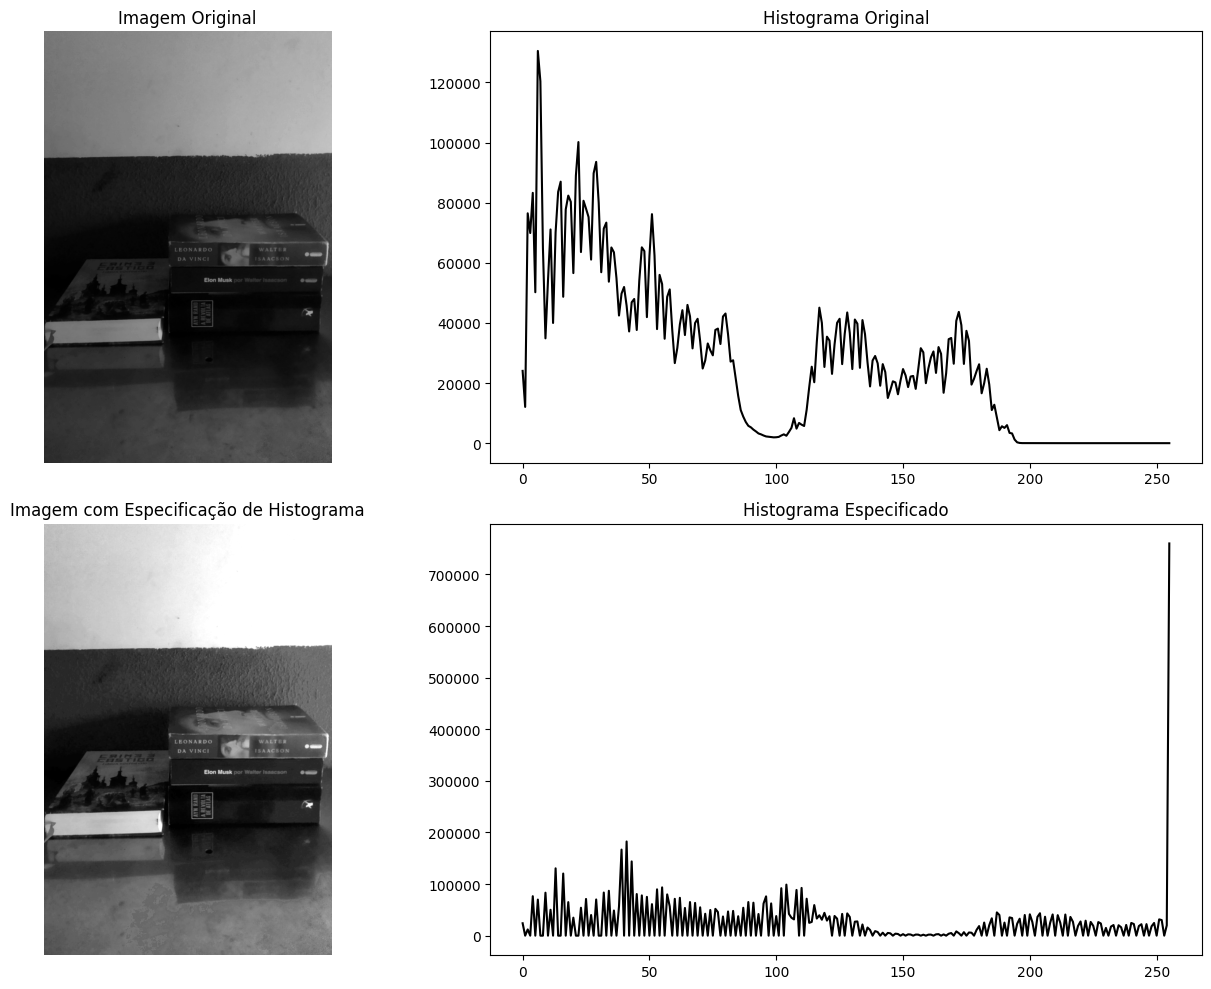

In [4]:

def especificar_histograma_manual_propria(imagem):    
    funcao_transformacao = np.zeros(256, dtype=float)   
    
    for i in range(256):
        if i < 20:
            funcao_transformacao[i] = i * 2.3 
        elif i < 64:
            funcao_transformacao[i] = i* 1.9  
        elif i < 128:
            funcao_transformacao[i] = i* 1.6  
        else:
            funcao_transformacao[i] = i * 1.6      
    
    funcao_transformacao = np.clip(funcao_transformacao, 0, 255)      
    imagem_especificada = np.interp(imagem.flatten(), np.arange(256), funcao_transformacao)    
    
    return imagem_especificada.reshape(imagem.shape).astype(np.uint8)

imagem_propria_especificada = especificar_histograma_manual_propria(imagem_propria)

plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
plt.imshow(imagem_propria, cmap='gray', vmin=0, vmax=255)
plt.title('Imagem Original')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.plot(calcular_histograma(imagem_propria), color='black')
plt.title('Histograma Original')

plt.subplot(2, 2, 3)
plt.imshow(imagem_propria_especificada, cmap='gray', vmin=0, vmax=255)
plt.title('Imagem com Especificação de Histograma')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.plot(calcular_histograma(imagem_propria_especificada), color='black')
plt.title('Histograma Especificado')

plt.tight_layout()
plt.show()


## Comparando as 3 imagens próprias

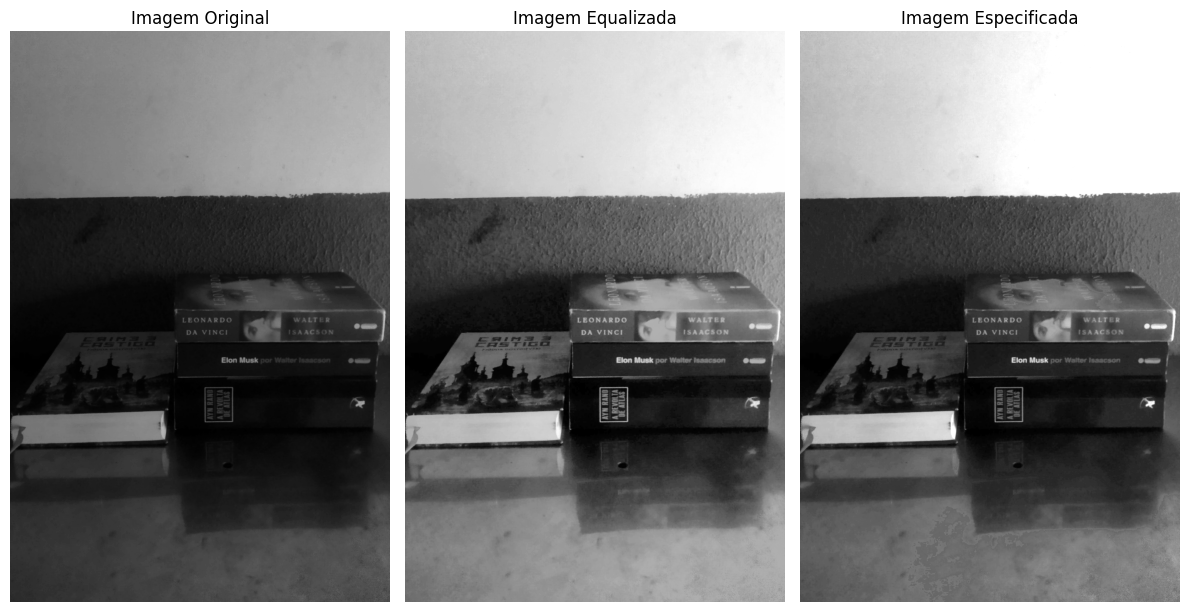

In [5]:
plt.figure(figsize=(12, 12))

plt.subplot(1, 3, 1)
plt.imshow(imagem_propria, cmap='gray', vmin=0, vmax=255)
plt.title('Imagem Original')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(imagem_propria_equalizada, cmap='gray', vmin=0, vmax=255)
plt.title('Imagem Equalizada')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(imagem_propria_especificada, cmap='gray', vmin=0, vmax=255)
plt.title('Imagem Especificada')
plt.axis('off')

plt.tight_layout()
plt.show()

# Discussão sobre os resultados

- A ***equalização*** de histograma melhora o contraste, tornando áreas escuras mais visíveis, mas pode clarear excessivamente especialmente em cenas com grande variação de iluminação. Como podemos ver a segunda iamgem clareou excessivamente a imagem toda em si

- Já a ***especificação*** de histograma oferece um controle mais refinado, preservando a estrutura original e suavizando transições de tons. Essa técnica realça detalhes nas sombras sem distorcer áreas claras, sendo ideal para capturas naturais, como fotos de celular, onde é necessário um equilíbrio mais sutil entre áreas escuras e iluminadas como podemos ver na terceira imagem.

Concluindo, a especificação de histograma é a técnica preferível em situações onde se deseja melhorar detalhes em áreas escuras sem sacrificar a integridade das áreas mais claras. Já a equalização pode ser útil quando a prioridade é maximizar o contraste geral em uma imagem muito escura, embora com o risco de perder sutilezas em tons mais brilhantes. 